ANALYSIS OF COVID-19 CASES AND DEATHS IN THE UNITED STATES AND ITS TERRITORIES- BY DATE, STATE AND COUNTY (THROUGH JULY 18, 2020)

STEP 1: IMPORT DATA INTO PANDAS DATAFRAME:

In [1]:
import pandas as pd
df = pd.read_csv('resources/us-counties.csv', index_col='date', 
                  parse_dates=['date'])
df.tail()

,county,state,fips,cases,deaths
date,,,,,
2020-07-18,Sweetwater,Wyoming,56037.0,171,2
2020-07-18,Teton,Wyoming,56039.0,197,1
2020-07-18,Uinta,Wyoming,56041.0,221,0
2020-07-18,Washakie,Wyoming,56043.0,42,5
2020-07-18,Weston,Wyoming,56045.0,4,0


In [2]:
df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
df.to_html("us_counties.html")

In [3]:
# investigate number of states
numstates=df['state'].nunique()
stateslist=df['state'].unique()
print(f' Number of states and territories in dataset: {numstates}')
print(f' ')
print(f' List of included states and territories: {stateslist}')


 Number of states and territories in dataset: 55
 
 List of included states and territories: ['Washington' 'Illinois' 'California' 'Arizona' 'Massachusetts'
 'Wisconsin' 'Texas' 'Nebraska' 'Utah' 'Oregon' 'Florida' 'New York'
 'Rhode Island' 'Georgia' 'New Hampshire' 'North Carolina' 'New Jersey'
 'Colorado' 'Maryland' 'Nevada' 'Tennessee' 'Hawaii' 'Indiana' 'Kentucky'
 'Minnesota' 'Oklahoma' 'Pennsylvania' 'South Carolina'
 'District of Columbia' 'Kansas' 'Missouri' 'Vermont' 'Virginia'
 'Connecticut' 'Iowa' 'Louisiana' 'Ohio' 'Michigan' 'South Dakota'
 'Arkansas' 'Delaware' 'Mississippi' 'New Mexico' 'North Dakota' 'Wyoming'
 'Alaska' 'Maine' 'Alabama' 'Idaho' 'Montana' 'Puerto Rico'
 'Virgin Islands' 'Guam' 'West Virginia' 'Northern Mariana Islands']


Note that the date range of the dataset is from 2020-01-21 to 2020-07-19.
To create animated time series of the Datasets I used the instructions from the web site: 
https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096

STEP 2: CREATE INDIVIDUAL BAR CHARTS FOR SPECIFIC DATES:

In [4]:
day= df.loc['2020-07-18']
day = day.groupby('state').sum()
day= day.drop('fips', axis = 1)
day.head()

,cases,deaths
state,,
Alabama,65234,1286
Alaska,2157,16
Arizona,141333,2733
Arkansas,32533,357
California,383194,7697


(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000.]),
 <a list of 10 Text major ticklabel objects>)

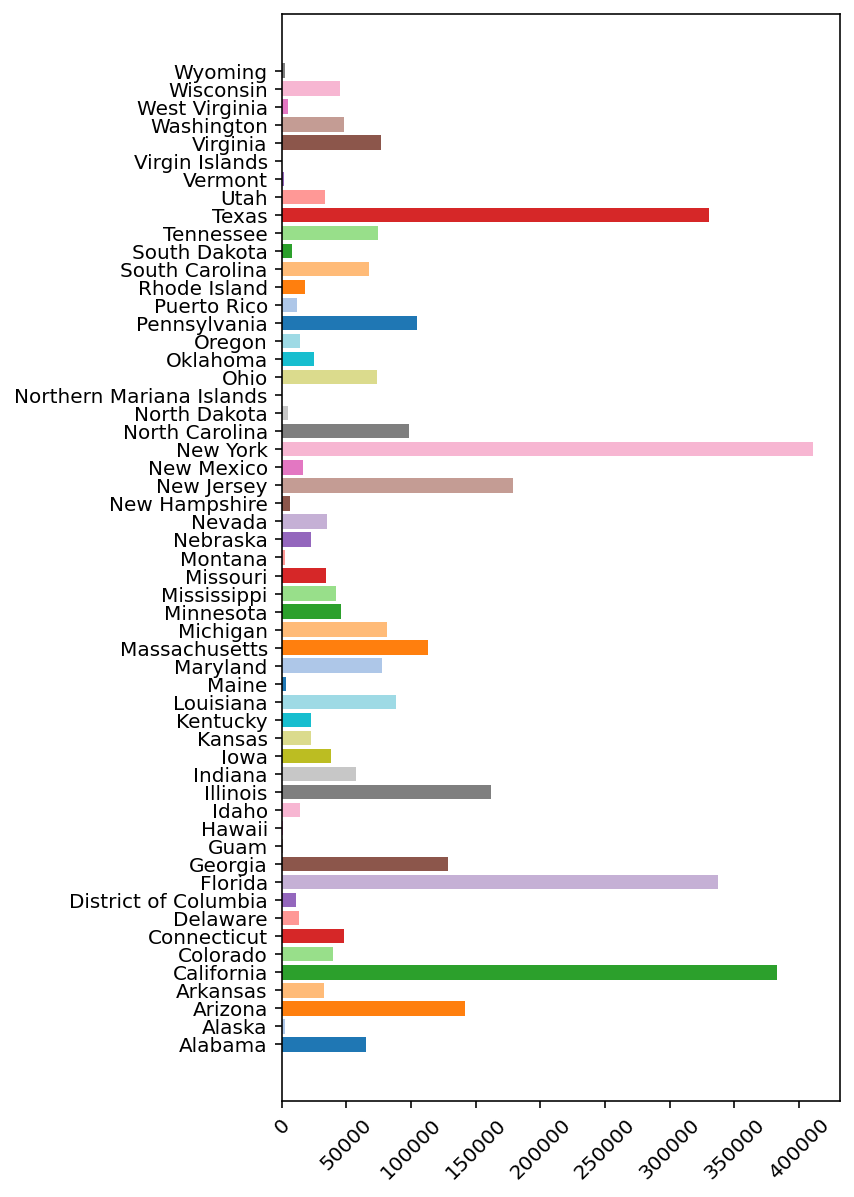

In [5]:
# bar chart for number of cases in all states and territories on 07-18-2020
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax= plt.subplots(figsize=(5,10), dpi = 144)
ydata=day.index
colors=plt.cm.tab20(range(20))
width = day['cases'].values
ax.barh(y=ydata, width =width, color= colors)
plt.xticks(rotation=45)

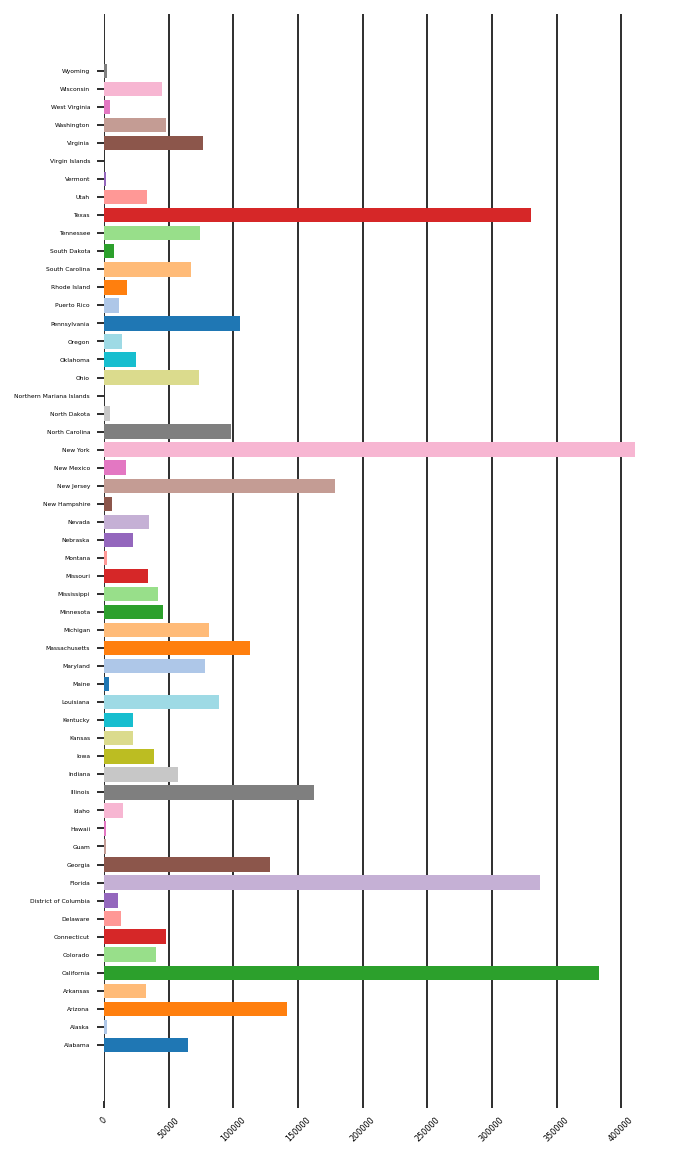

In [6]:
# change axes to nice axis
def nice_axes (ax):
    ax.tick_params(labelsize=5)
    ax.grid(True, axis='x', color='black')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(3)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(4)
nice_axes(ax)
fig

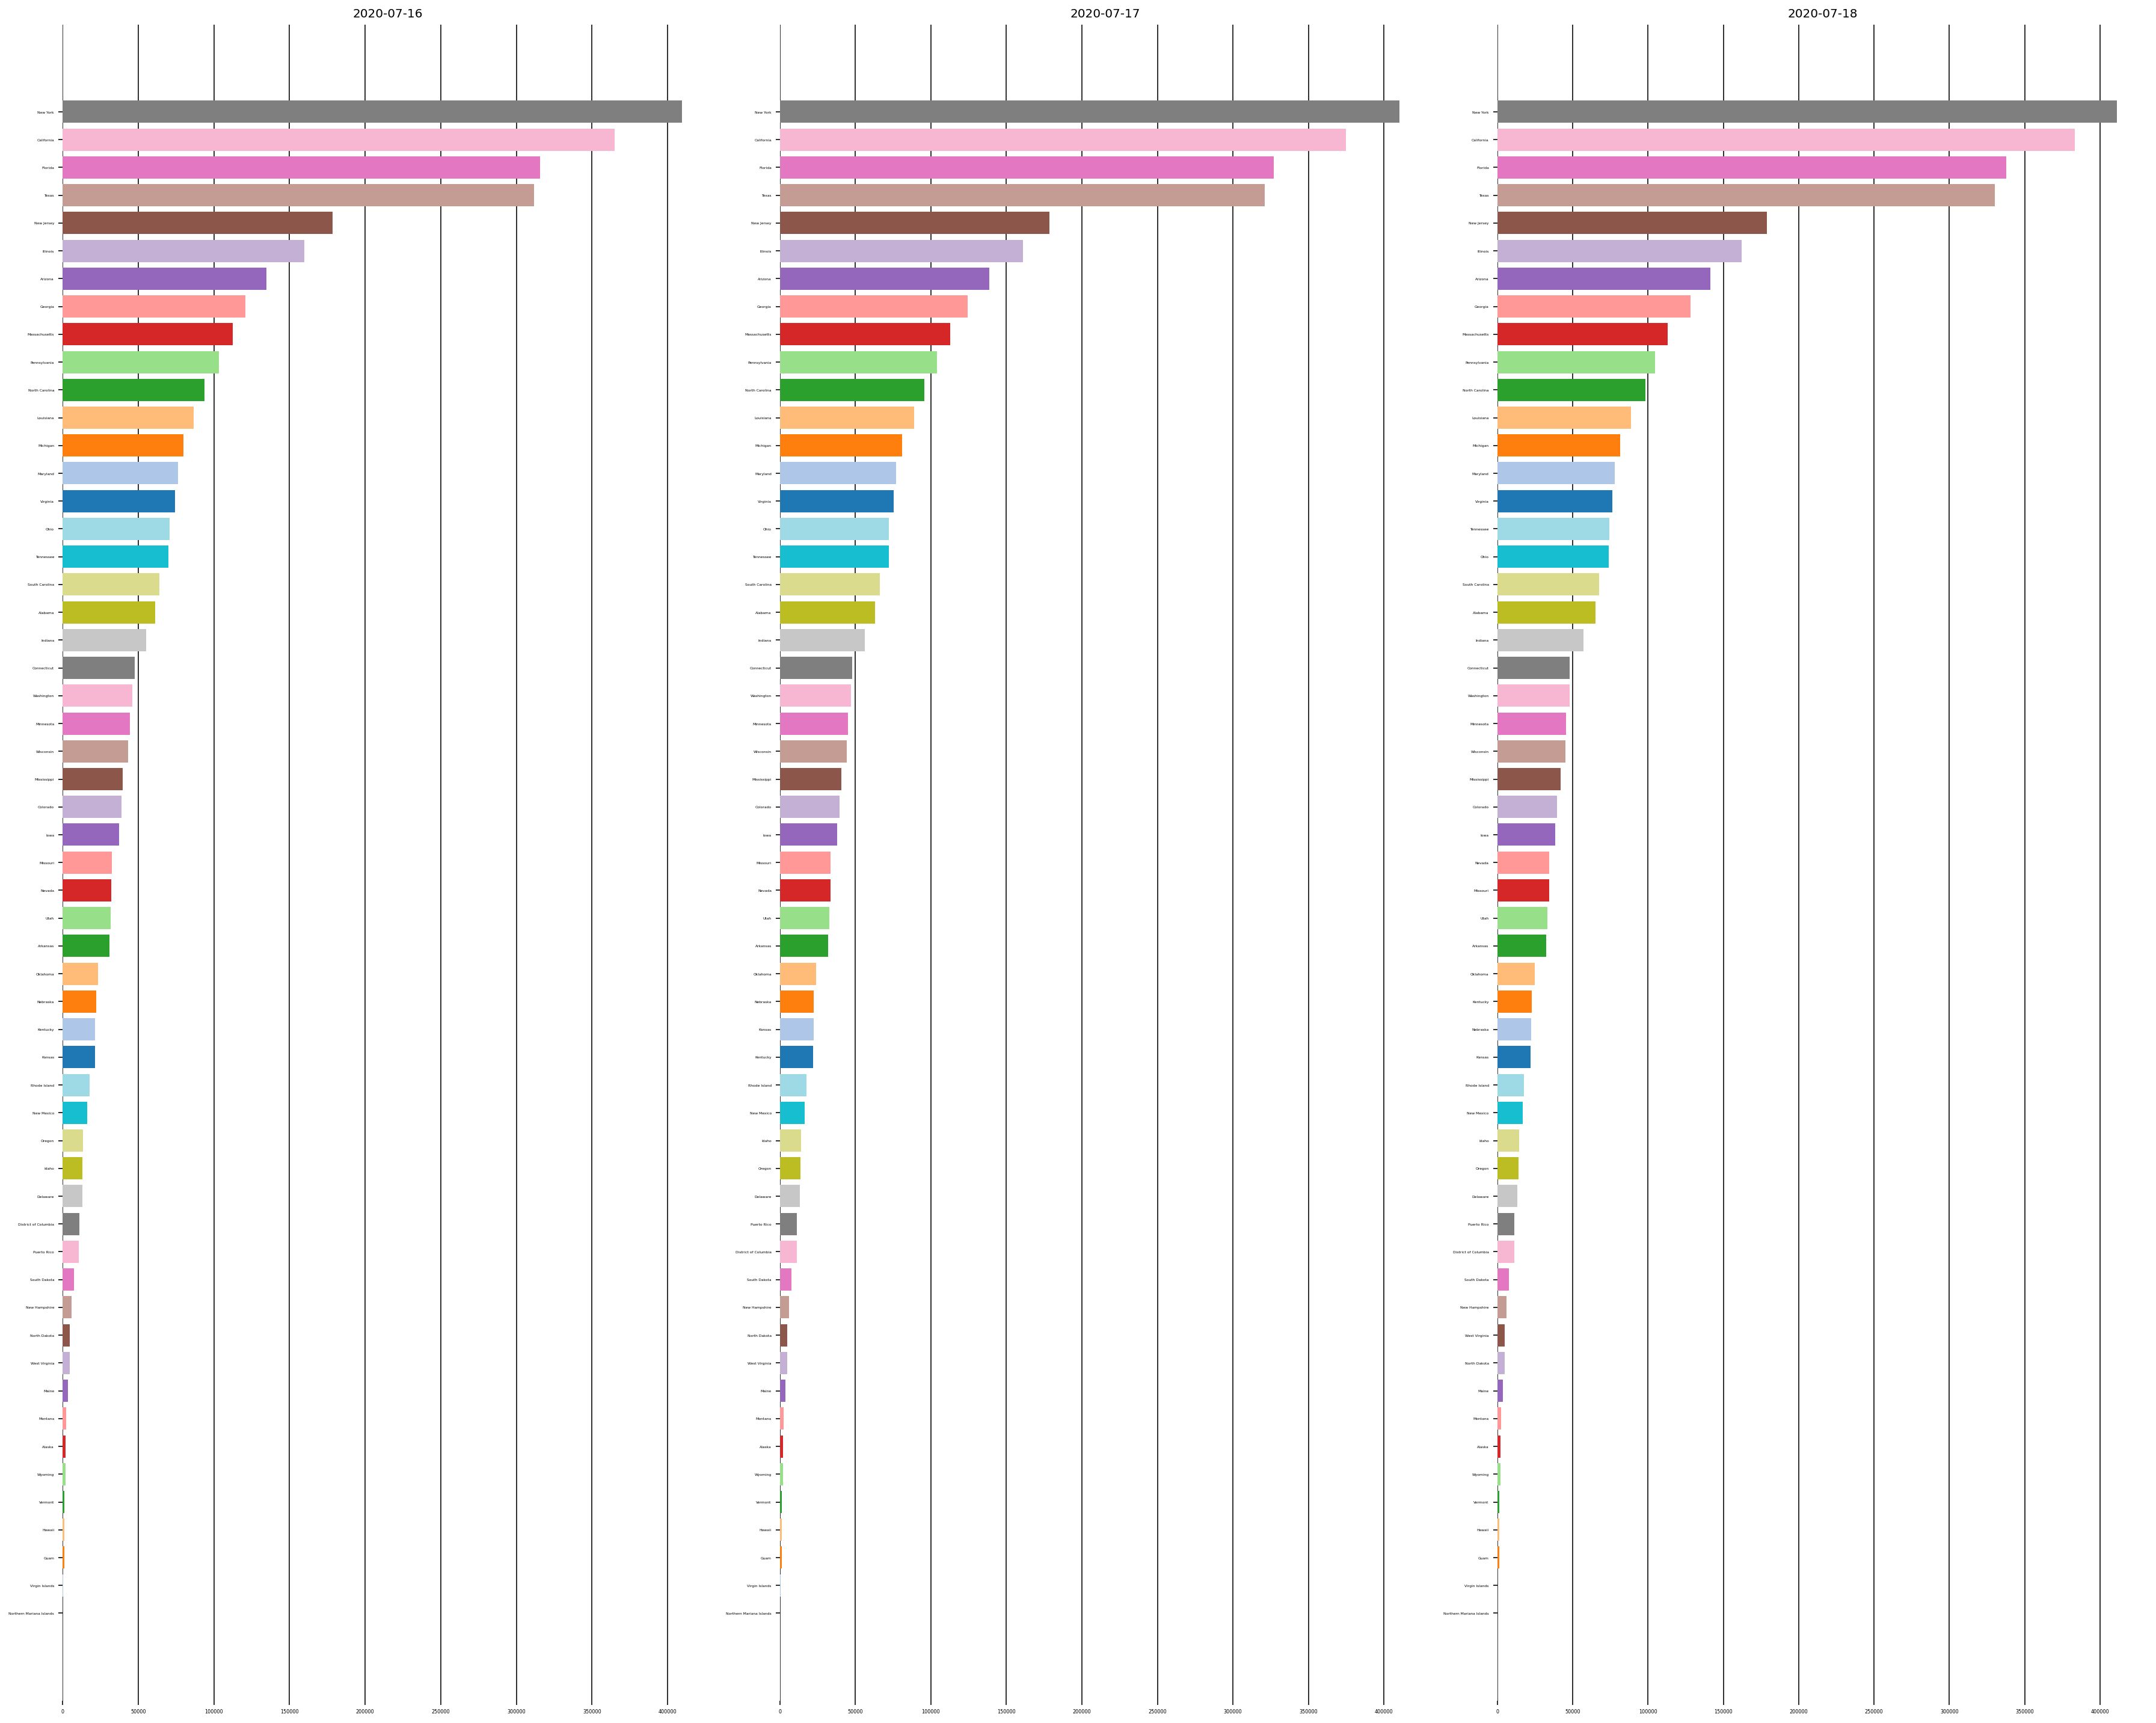

In [7]:
# plot three consecutive days ordering the bars, with values sorted by numebr cases:
fig,ax_array = plt.subplots(nrows=1, ncols=3, figsize=(25,20), dpi=144, tight_layout=True)

dates=['2020-07-16', '2020-07-17', '2020-07-18']
for ax, date in zip(ax_array, dates):
    s= df.loc[date]
    s_states = s.groupby('state').sum()
    s_states= s_states.drop('fips', axis = 1)
    s_states=s_states.sort_values('cases')
    ydata=s_states.index
    colors=plt.cm.tab20(range(20))
    width = s_states['cases'].values
    ax.barh(y=ydata, width =width, color= colors)
    ax.set_title(date, fontsize=10)
    nice_axes(ax)

plt.show()

In [8]:
# rank the states by cases:
day['cases'].rank(method='first')

state
Alabama                     37.0
Alaska                       7.0
Arizona                     49.0
Arkansas                    25.0
California                  54.0
Colorado                    30.0
Connecticut                 35.0
Delaware                    16.0
District of Columbia        14.0
Florida                     53.0
Georgia                     48.0
Guam                         3.0
Hawaii                       4.0
Idaho                       18.0
Illinois                    50.0
Indiana                     36.0
Iowa                        29.0
Kansas                      21.0
Kentucky                    23.0
Louisiana                   44.0
Maine                        9.0
Maryland                    42.0
Massachusetts               47.0
Michigan                    43.0
Minnesota                   33.0
Mississippi                 31.0
Missouri                    27.0
Montana                      8.0
Nebraska                    22.0
Nevada                      28.0
New 

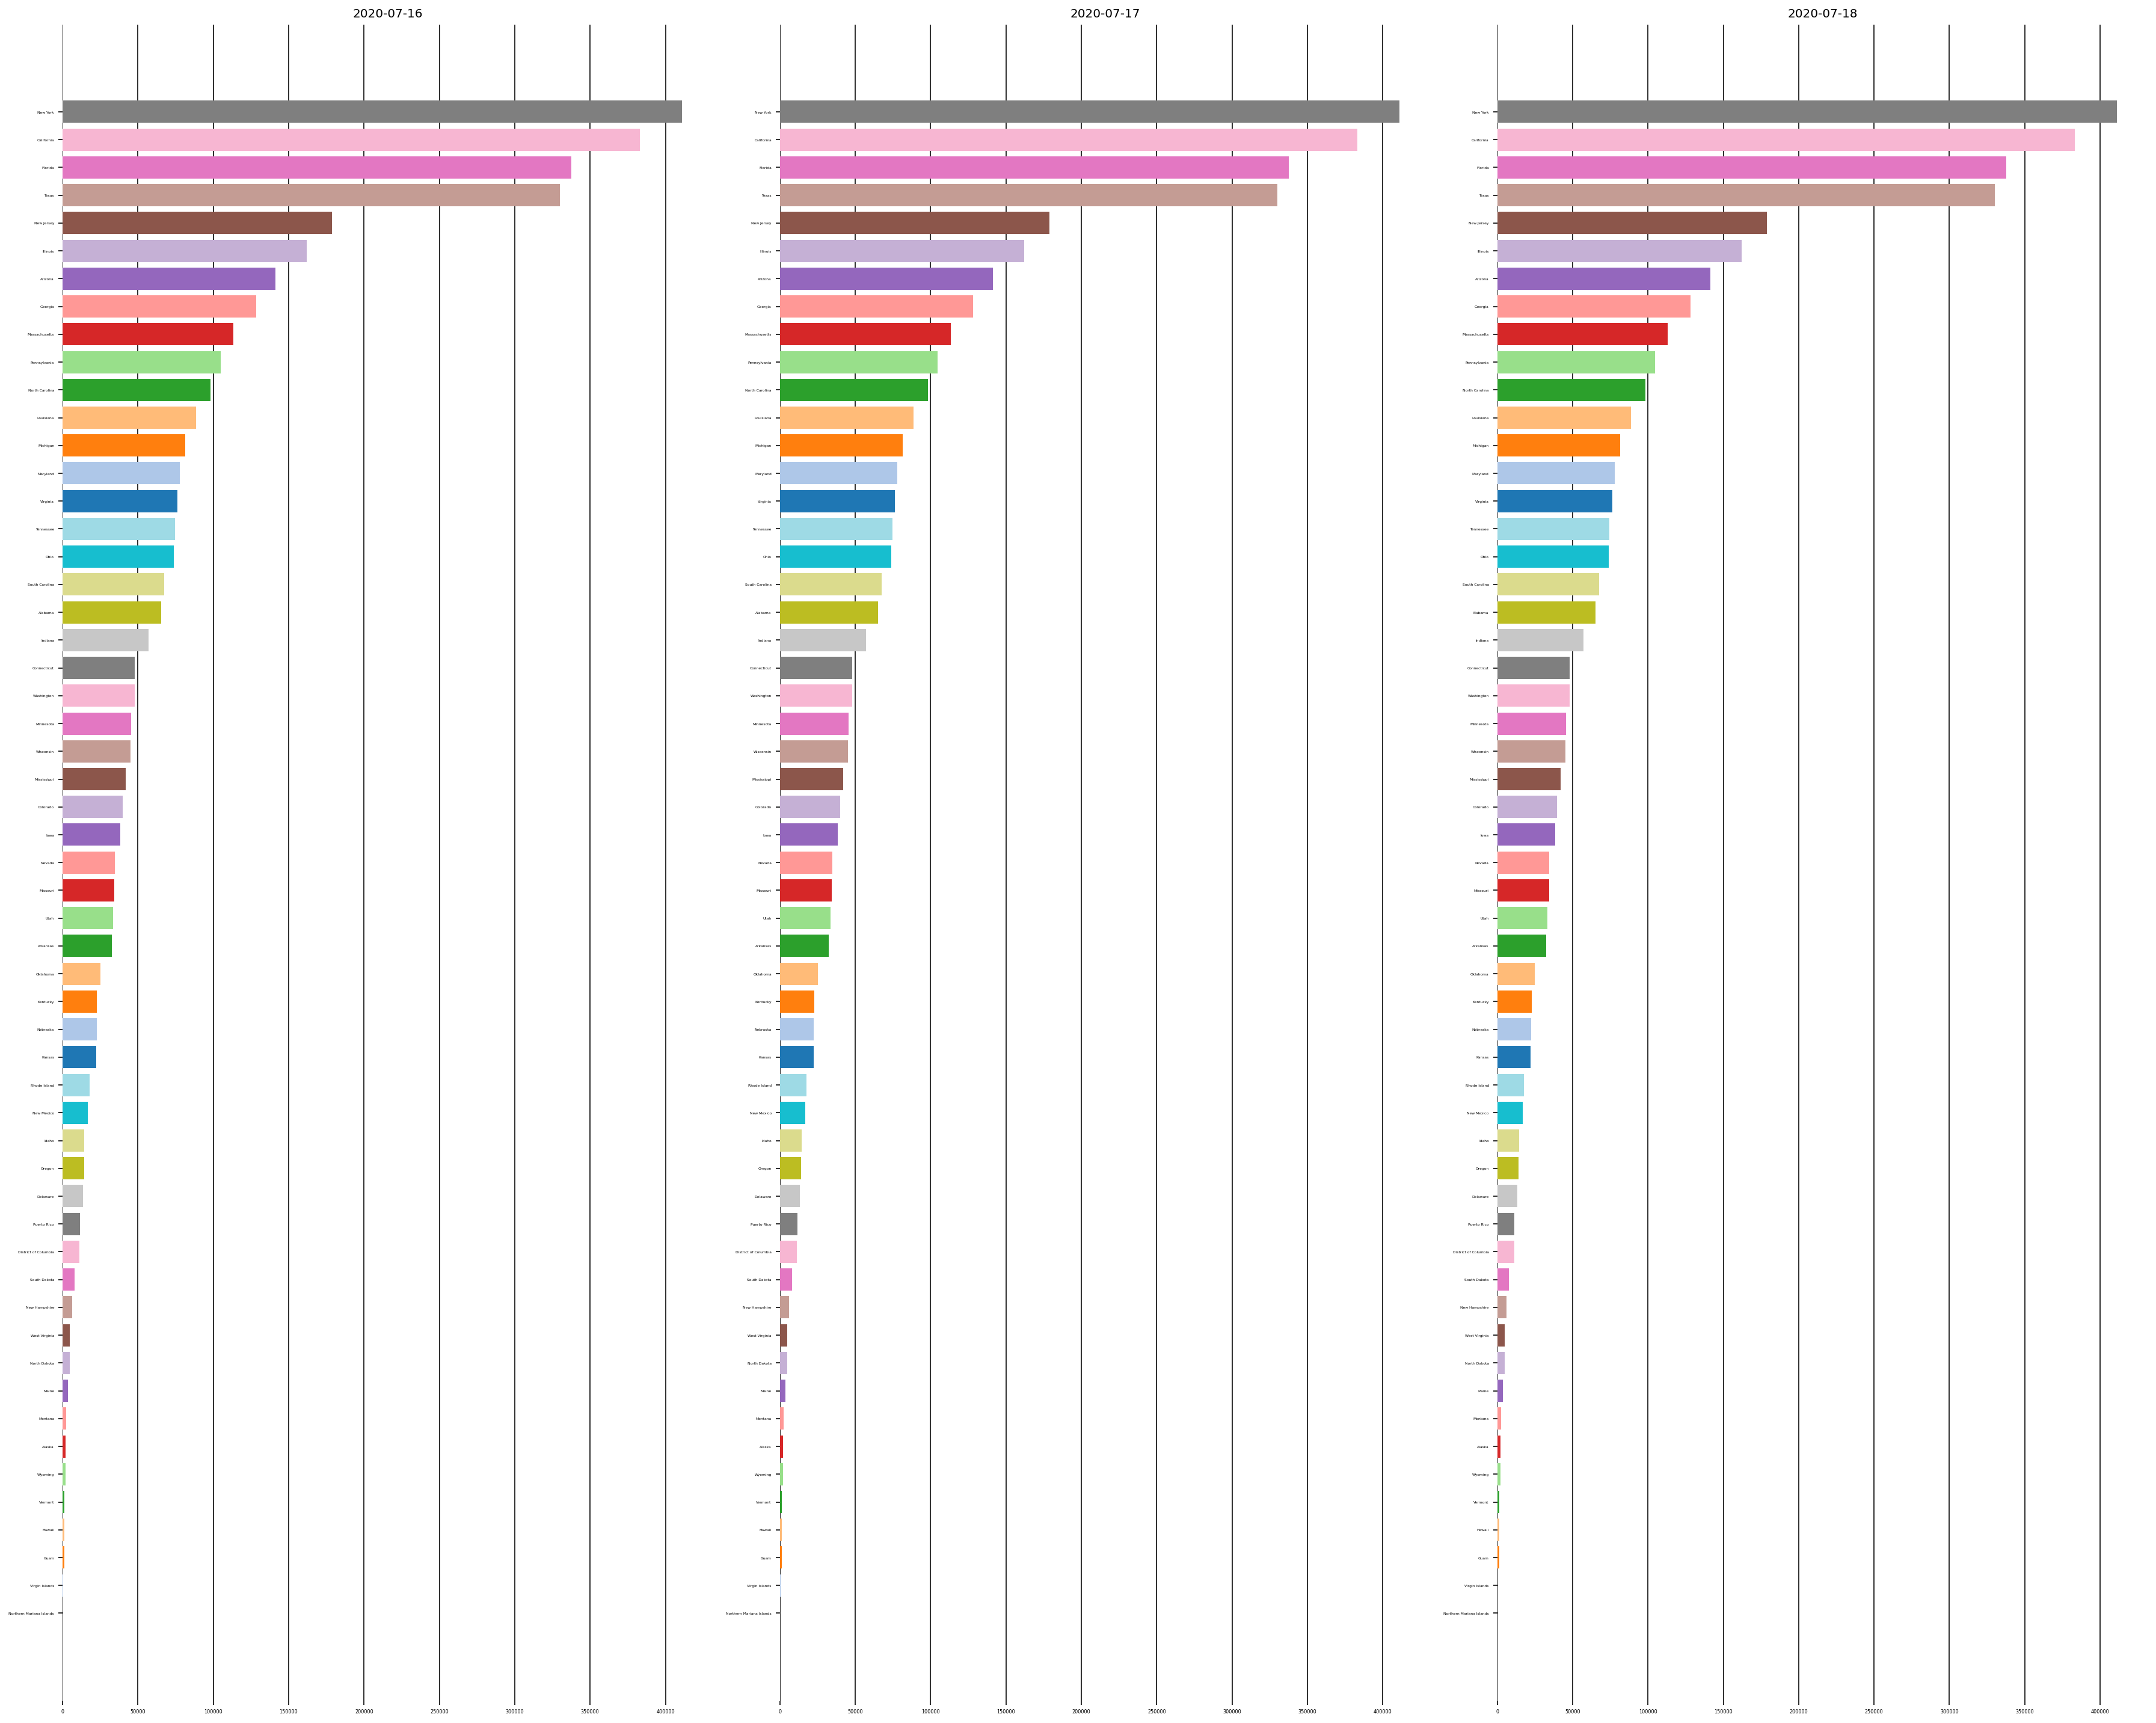

In [9]:
# use rank in y values on plot so that states change color and position as they change relative rank based on cases:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(25,20), dpi=144, tight_layout=True)
dates = ['2020-07-16', '2020-07-17', '2020-07-18']
for ax, date in zip(ax_array, dates):
    day= df.loc[date]
    day = day.groupby('state').sum()
    day= day.drop('fips', axis = 1)
    y=day['cases'].rank(method='first').values
    colors=plt.cm.tab20(range(20))
    width = s_states['cases'].values
    ax.barh(y=ydata, width =width, color= colors)
    ax.set_title(date, fontsize=10)
    nice_axes(ax)
    

In [10]:
# smoothly transition between days:
days= df.loc['2020-01-21':'2020-07-19']
days= days.drop('fips', axis = 1)
days=days.groupby(['date', 'state']).sum()
days=days.reset_index()
days.head()


,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0


In [11]:
# make one dataframe for cases only and another for deaths only
# transpose the states row into columns so that each date in each dataframe has only one row associated with it:
cases_to_plt=days.pivot(index='date', columns='state', values='cases')
cases_to_plt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2020-01-21 to 2020-07-18
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alabama                   128 non-null    float64
 1   Alaska                    129 non-null    float64
 2   Arizona                   175 non-null    float64
 3   Arkansas                  130 non-null    float64
 4   California                176 non-null    float64
 5   Colorado                  136 non-null    float64
 6   Connecticut               133 non-null    float64
 7   Delaware                  130 non-null    float64
 8   District of Columbia      134 non-null    float64
 9   Florida                   140 non-null    float64
 10  Georgia                   139 non-null    float64
 11  Guam                      126 non-null    float64
 12  Hawaii                    135 non-null    float64
 13  Idaho                     128 non-null    floa

In [12]:
# do the same for deaths:
deaths_to_plt= days.pivot(index='date', columns='state', values='deaths')
deaths_to_plt


state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,1164.0,15.0,2341.0,331.0,7227.0,1739.0,4372.0,518.0,568.0,4408.0,...,757.0,3449.0,226.0,56.0,6.0,1977.0,1465.0,97.0,834.0,22.0
2020-07-15,1211.0,15.0,2442.0,335.0,7368.0,1745.0,4380.0,521.0,571.0,4520.0,...,773.0,3590.0,233.0,56.0,6.0,1992.0,1486.0,98.0,835.0,22.0
2020-07-16,1230.0,15.0,2506.0,341.0,7490.0,1746.0,4389.0,521.0,574.0,4676.0,...,786.0,3744.0,234.0,56.0,6.0,2007.0,1492.0,99.0,839.0,24.0


In [13]:
# function to prepare the data:
def prepare_data(df, steps=5):
    df2= df.reset_index()
    df2.index = df2.index * steps
    last_idx = df2.index[-1] + 1
    df_expanded = df2.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded



In [14]:
# prepare cases data:
df_expanded, df_rank_expanded = prepare_data(cases_to_plt)
cases=df_expanded.fillna(0)
cases.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
cases_rank=df_rank_expanded.fillna(0)
cases_rank.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
# animation  for cases
%matplotlib inline
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    
def update(i):
    for bar in ax.containers:
        bar.remove()
    y = cases_rank.iloc[i]
    width = cases.iloc[i]
    labels = cases.columns
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
    date_str = cases.index[i].strftime('%m %d, %Y')
    ax.set_title(f'COVID-19 Cases by State - {date_str}', fontsize='smaller')
    plt.tight_layout()
    
fig = plt.Figure(figsize=(6, 6), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [17]:
# # call cases animation to video
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)


<Figure size 432x288 with 0 Axes>

In [18]:
df_expanded, df_rank_expanded = prepare_data(deaths_to_plt)
deaths=df_expanded.fillna(0)
deaths_rank = df_rank_expanded.fillna(0)
deaths.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# animation  for deaths
%matplotlib inline
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    
def update(i):
    for bar in ax.containers:
        bar.remove()
    y = deaths_rank.iloc[i]
    width = deaths.iloc[i]
    labels = deaths.columns
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
    date_str = deaths.index[i].strftime('%m %d, %Y')
    ax.set_title(f'COVID-19 Deaths by State - {date_str}', fontsize='smaller')
    plt.tight_layout()
    
fig = plt.Figure(figsize=(6, 6), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [20]:
# # call deaths animation to video
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

<Figure size 432x288 with 0 Axes>